# Supplement Sales Prediction


Your Client WOMart is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all your wellness and fitness needs. 

WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities. 

Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan the cashflow at the store level.

Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

The Task is to predict the store sales for each store in the test set for the next two months.

# 1. Data Preparation


The dataset contain the two files in the csv format:

TRAIN.csv : this file has 188340 rows and 10 columns.

TEST_FINAL.csv : this file has 22265 rows and 8 columns.

Variable : Definition

ID : Unique Identifier for a row

Store_id : Unique id for each Store

Store_Type : Type of the Store

Location_Type : Type of the location where Store is located

Region_Code :Code of the Region where Store is located

Date : Information about the Date

Holiday : If there is holiday on the given Date, 1 : Yes, 0 : No

Discount : If discount is offered by store on the given Date, Yes/ No

Orders : Number of Orders received by the Store on the given Day
    
Sales : Total Sale for the Store on the given Day

Importing Neccessary libraries

In [1]:
import pandas as pd
import numpy as sns
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (20, 10)

Loading csv files to dataframe

In [3]:
df_train= pd.read_csv('TRAIN.csv')
df_test = pd.read_csv('TEST_FINAL.csv')

checking for missing values and data types in training set

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [5]:
df_train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

- No missing values.Data set looks clean
- Date need to be converted into Date time instead of object

Checking for missing values and data types in test data set

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [7]:
df_test.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

- NO missing values found and data set look clean. order catergory is not in test data set
-Date need to be converted into Date time instead of object

First look of the train data set

In [8]:
df_train.head()

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0  T1000001         1         S1            L3          R1  2018-01-01   
1  T1000002       253         S4            L2          R1  2018-01-01   
2  T1000003       252         S3            L2          R1  2018-01-01   
3  T1000004       251         S2            L3          R1  2018-01-01   
4  T1000005       250         S2            L3          R4  2018-01-01   

   Holiday Discount  #Order     Sales  
0        1      Yes       9   7011.84  
1        1      Yes      60  51789.12  
2        1      Yes      42  36868.20  
3        1      Yes      23  19715.16  
4        1      Yes      62  45614.52

First look of the test data set

In [9]:
df_test.head()

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0  T1188341       171         S4            L2          R3  2019-06-01   
1  T1188342       172         S1            L1          R1  2019-06-01   
2  T1188343       173         S4            L2          R1  2019-06-01   
3  T1188344       174         S1            L1          R4  2019-06-01   
4  T1188345       170         S1            L1          R2  2019-06-01   

   Holiday Discount  
0        0       No  
1        0       No  
2        0       No  
3        0       No  
4        0       No

Before we change anything in the original Dataframe, we create a copy

In [10]:
EDA_train = df_train.copy()
EDA_test = df_test.copy()

# 2. Exploratory Data Analysis

Before we starting to explority data analysis we need to convert Date column object as  Date time

In [11]:
EDA_train["Date"]=  pd.to_datetime(EDA_train["Date"])

In [12]:
EDA_train.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1000001         1         S1            L3          R1 2018-01-01   
1  T1000002       253         S4            L2          R1 2018-01-01   
2  T1000003       252         S3            L2          R1 2018-01-01   
3  T1000004       251         S2            L3          R1 2018-01-01   
4  T1000005       250         S2            L3          R4 2018-01-01   

   Holiday Discount  #Order     Sales  
0        1      Yes       9   7011.84  
1        1      Yes      60  51789.12  
2        1      Yes      42  36868.20  
3        1      Yes      23  19715.16  
4        1      Yes      62  45614.52

In [13]:
EDA_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.4+ MB


The Date object converted to Date time.Repeating the same step for test data set

In [14]:
EDA_test["Date"]=  pd.to_datetime(EDA_test["Date"])

In [15]:
EDA_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             22265 non-null  object        
 1   Store_id       22265 non-null  int64         
 2   Store_Type     22265 non-null  object        
 3   Location_Type  22265 non-null  object        
 4   Region_Code    22265 non-null  object        
 5   Date           22265 non-null  datetime64[ns]
 6   Holiday        22265 non-null  int64         
 7   Discount       22265 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 1.4+ MB


In [16]:
EDA_test.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1188341       171         S4            L2          R3 2019-06-01   
1  T1188342       172         S1            L1          R1 2019-06-01   
2  T1188343       173         S4            L2          R1 2019-06-01   
3  T1188344       174         S1            L1          R4 2019-06-01   
4  T1188345       170         S1            L1          R2 2019-06-01   

   Holiday Discount  
0        0       No  
1        0       No  
2        0       No  
3        0       No  
4        0       No

In [17]:
EDA_train['Sales'].describe()

count    188340.000000
mean      42784.327982
std       18456.708302
min           0.000000
25%       30426.000000
50%       39678.000000
75%       51909.000000
max      247215.000000
Name: Sales, dtype: float64

Judging by the mean and maximum values of sales, there are some outliers.
We need to keep this in mind and will exclude them for our first visualisations

Question: How many shops and products do we have? 

In [18]:
EDA_train.nunique()

ID               188340
Store_id            365
Store_Type            4
Location_Type         5
Region_Code           4
Date                516
Holiday               2
Discount              2
#Order              299
Sales             47422
dtype: int64

-We have 365 stores in train data set, 4 store types distributed among in 5 location types with 4 Region codes

In [19]:
EDA_test.nunique()

ID               22265
Store_id           365
Store_Type           4
Location_Type        5
Region_Code          4
Date                61
Holiday              2
Discount             2
dtype: int64

-Need to check any corelation between #orders and sales

Correlation between oder and sales: 0.9416005646125759


<AxesSubplot:xlabel='#Order', ylabel='Sales'>

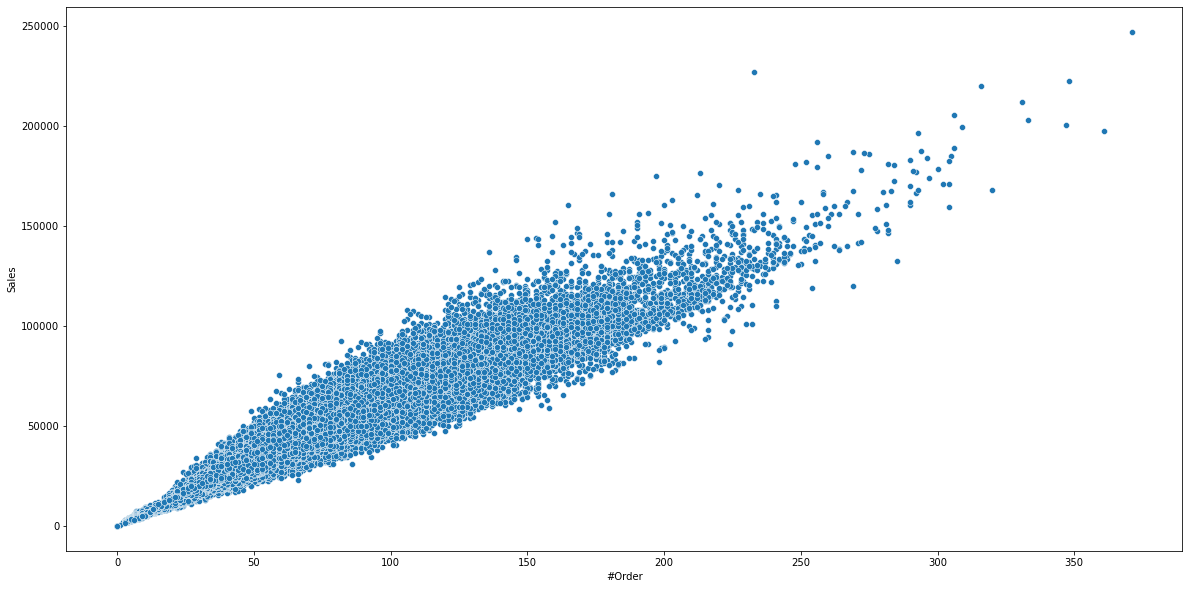

In [20]:
correlation = EDA_train['#Order'].corr(EDA_train['Sales'])
print("Correlation between oder and sales:",correlation)
sns.scatterplot(x=EDA_train['#Order'],y=EDA_train['Sales'])

There a postive correlation between sales and orders .so only considering sales figure from onwards for Exploratorty Data Analysis

-We have 365 stores in test data set, 4 store types distributed among in 5 location types with 4 Region codes

What is our target?
-We want to predict the number of items sold for test data .
Let's go ahead and take a closer look at the items.


Finding how many stores for each category of store types

## Store Types

In [21]:
typecounts = EDA_train.Store_Type.value_counts().to_dict()
EDA_train_store_types = pd.DataFrame(list(typecounts.items()), columns=['Store_Type', 'Counts'])
EDA_train_store_types.sort_values(by='Counts',inplace=True,ascending=False)
EDA_train_store_types

Store_Type  Counts
0         S1   88752
1         S4   45924
2         S2   28896
3         S3   24768

In [22]:
#plotting figure of each store types as pie chart

In [23]:
fig = px.pie(EDA_train_store_types, values='Counts', names='Store_Type',
             title='Popularity of Store Types',labels='Store_Type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- S1 have large number of store counts,then S4
- Lets find out the average sales of Each sales by box plot

<AxesSubplot:title={'center':'Sales'}, xlabel='Store_Type'>

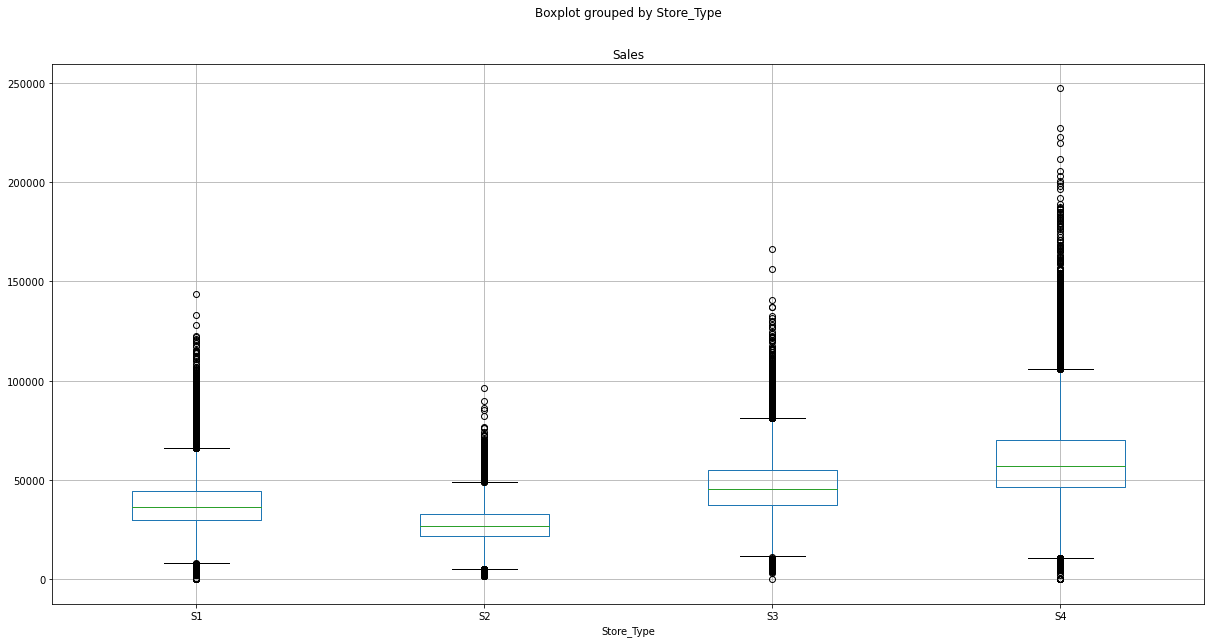

In [24]:

EDA_train.boxplot(by ='Store_Type', column =['Sales'])

- it is shown s4 have more average sales than s1
- having a lagre number og outliers.need to check these Outliers have any significance in data
- The number of stores doesn't have much importance in sales
- to verify this let's check it with order number by plotting box plot


<AxesSubplot:title={'center':'#Order'}, xlabel='Store_Type'>

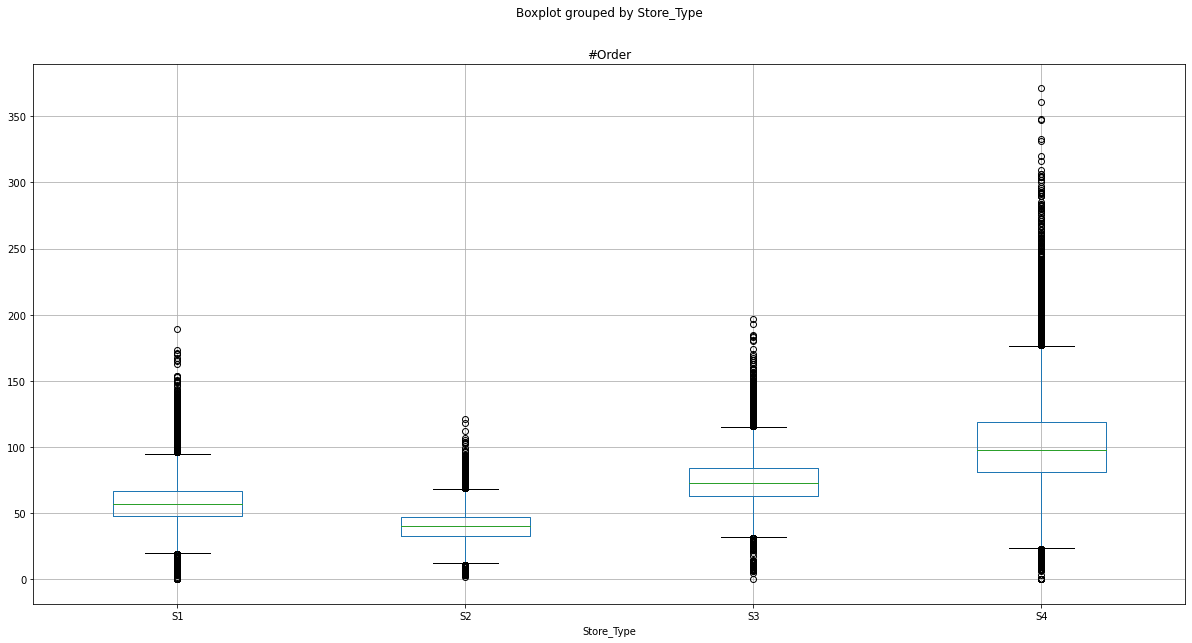

In [25]:
EDA_train.boxplot(by ='Store_Type', column =['#Order'])

- As previsoly mentioned the orders and sales have a strong correlation the sales and orders show same type of plots

Finding average sales of Each stores

In [26]:
avg_sales = EDA_train.groupby('Store_Type')['Sales'].mean().to_dict()
EDA_Train_avg_sales_storetype = pd.DataFrame(list(avg_sales.items()), columns=['Store_Type', 'AvgSales'])

EDA_Train_avg_sales_storetype 

Store_Type      AvgSales
0         S1  37676.511694
1         S2  27530.828222
2         S3  47063.068209
3         S4  59945.685926

In [27]:
fig = px.bar(EDA_Train_avg_sales_storetype, 
             x="Store_Type", 
             y="AvgSales",  
             title="Averge Sales - Per Store",
             color_discrete_sequence=["#DC143C"], template='plotly_dark')
fig.show()


- s4 and s3 have high average sales

## EDA on Location types

In [28]:
location_counts = EDA_train.Location_Type.value_counts().to_dict()
EDA_train_location_counts = pd.DataFrame(list(location_counts.items()), columns=['Location_Type', 'Counts'])


In [29]:
fig = px.pie(EDA_train_location_counts, values='Counts', names='Location_Type',
             title='Popularity of location Types',labels='location_Type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- L1 and L2 location have High number of stores

<AxesSubplot:title={'center':'Sales'}, xlabel='Location_Type'>

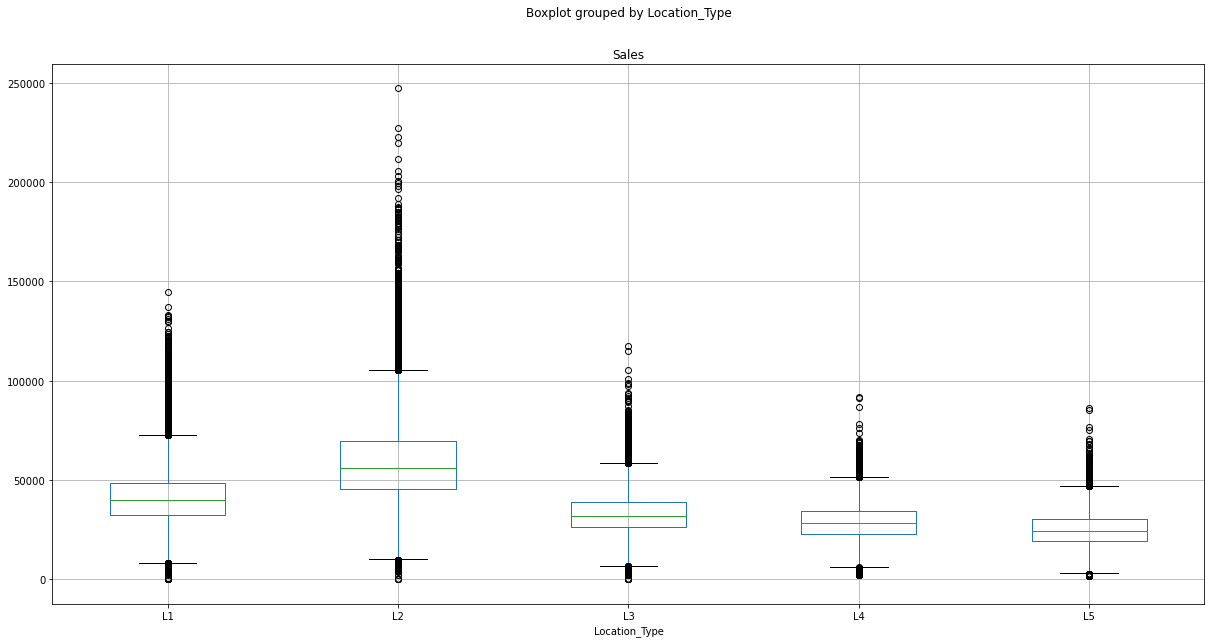

In [30]:
EDA_train.boxplot(by ='Location_Type', column =['Sales'])

In [31]:
avg_sales_Location = EDA_train.groupby('Location_Type')['Sales'].mean().to_dict()
EDA_Train_avg_sales_Locationtype = pd.DataFrame(list(avg_sales_Location.items()), columns=['Location_Type', 'AvgSales'])

EDA_Train_avg_sales_Locationtype

Location_Type      AvgSales
0            L1  41453.597889
1            L2  59231.480373
2            L3  33072.257756
3            L4  29067.414313
4            L5  25187.787261

In [32]:
fig = px.bar(EDA_Train_avg_sales_Locationtype, 
             x="Location_Type", 
             y="AvgSales",  
             title="Averge Sales - Per Location",
             color_discrete_sequence=["#DC143C"], template='plotly_dark')
fig.show()

- Location Types also effect the average sales 

# EDA on Regions types

In [33]:
region_counts = EDA_train.Region_Code.value_counts().to_dict()
EDA_train_region_counts = pd.DataFrame(list(region_counts.items()), columns=['Region_Type', 'Counts'])

fig = px.pie(EDA_train_region_counts, values='Counts', names='Region_Type',
             title='Popularity of Region Types',labels='Region_Type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<AxesSubplot:title={'center':'Sales'}, xlabel='Region_Code'>

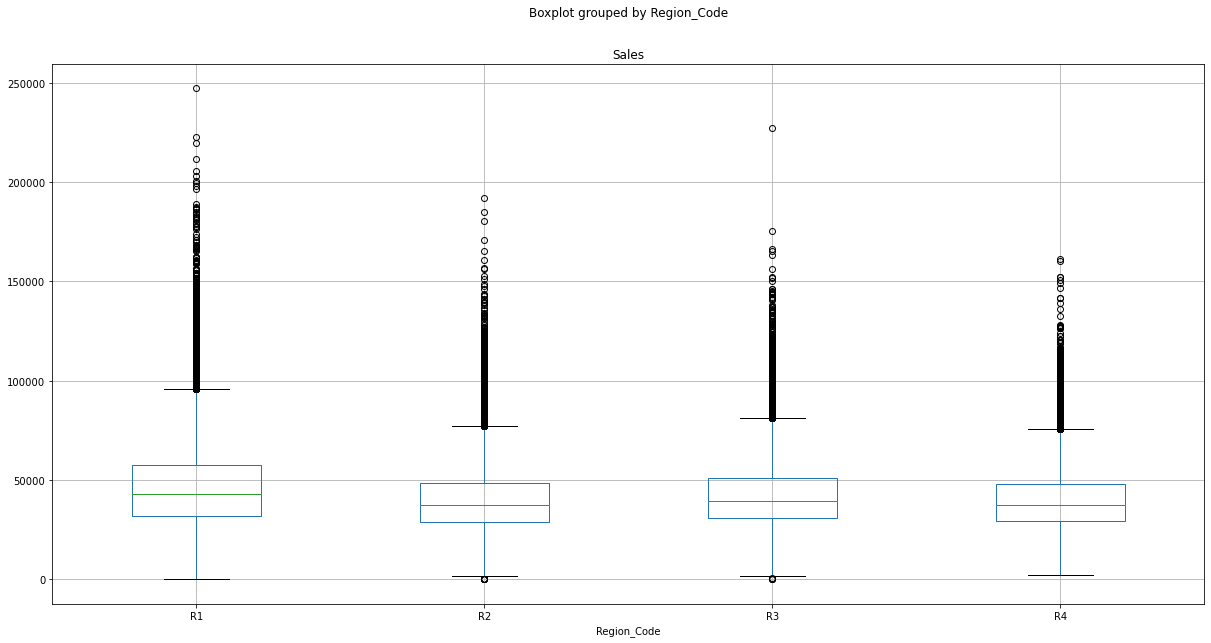

In [34]:
EDA_train.boxplot(by ='Region_Code', column =['Sales'])

In [35]:
avg_sales_Region= EDA_train.groupby('Region_Code')['Sales'].mean().to_dict()
EDA_Train_avg_sales_Region_code = pd.DataFrame(list(avg_sales_Region.items()), columns=['Region_Code', 'AvgSales'])

EDA_Train_avg_sales_Region_code

Region_Code      AvgSales
0          R1  46765.488405
1          R2  40054.847344
2          R3  42144.517063
3          R4  39743.434249

In [36]:
fig = px.bar(EDA_Train_avg_sales_Region_code, 
             x="Region_Code", 
             y="AvgSales",  
             title="Averge Sales - Per Regions",
             color_discrete_sequence=["#DC143C"], template='plotly_dark')
fig.show()

- Regions also a dependent feature on sales numbers

# EDA on Discount

To find How Giving Discount Effect

In [37]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Discount_sales = EDA_train.groupby('Discount')['Sales'].mean()
Discount_counts = EDA_train.Holiday.value_counts()

print(Discount_sales)
print(Discount_counts)

Discount
No     37403.679678
Yes    49426.497620
Name: Sales, dtype: float64
0    163520
1     24820
Name: Holiday, dtype: int64


In [38]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Mean Discount Sales Amount", "Discount Given Days"))

fig.add_trace(go.Bar(x=Discount_sales.values, y=Discount_sales.index, orientation='h',),1, 1)

fig.add_trace(go.Bar(x=Discount_sales.values, y=Discount_sales.index, orientation='h',),1, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template='plotly_dark', showlegend=False)
fig.show()

- Discounted Days gives higher number of sales

plotting line plot to find the same

<AxesSubplot:xlabel='Date', ylabel='Sales'>

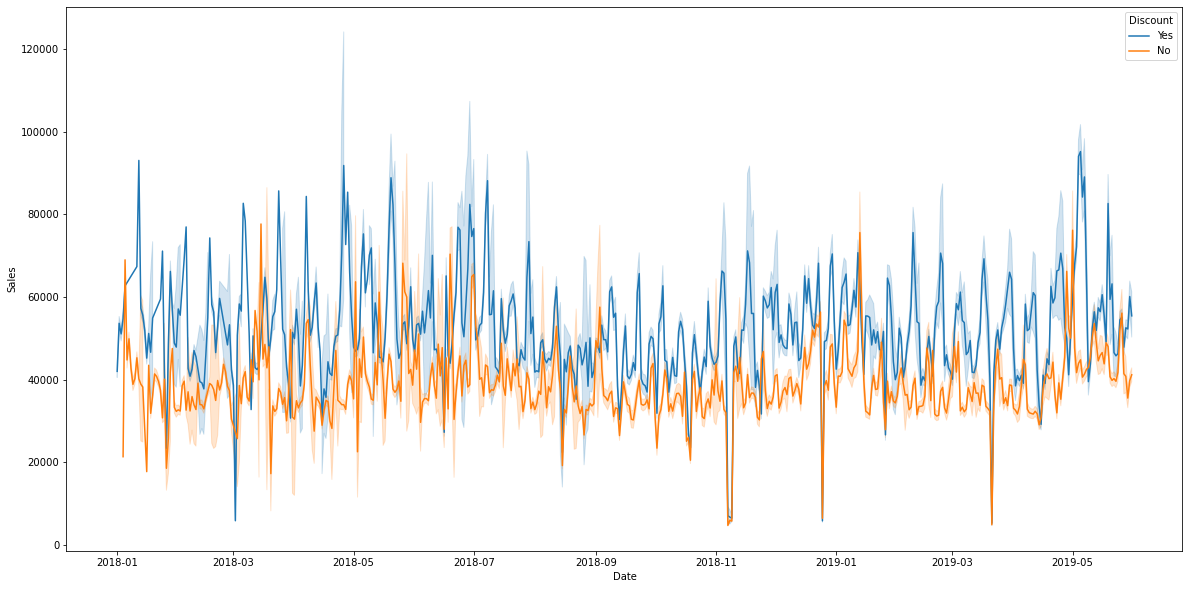

In [39]:
sns.lineplot(data=EDA_train, x="Date", y=(EDA_train['Sales']),hue='Discount')

- Discount given days have higher sales figure

# EDA on Holiday

In [40]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

holiday_sales = EDA_train.groupby('Holiday')['Sales'].mean()
holiday_counts = EDA_train.Holiday.value_counts()

print(holiday_sales)
print(holiday_counts)

Holiday
0    43897.288998
1    35451.878930
Name: Sales, dtype: float64
0    163520
1     24820
Name: Holiday, dtype: int64


In [41]:
holiday_sales.dtypes

dtype('float64')

In [42]:
EDA_Train_avg_sales_holidays = pd.DataFrame(list(holiday_sales.items()), columns=['Holidays', 'AvgSales'])

EDA_Train_avg_sales_holidays

Holidays      AvgSales
0         0  43897.288998
1         1  35451.878930

In [43]:
EDA_Train_avg_sales_holidays['Holidays'] = EDA_Train_avg_sales_holidays['Holidays'].map(
                   {True:'Yes',False:'No'})

In [44]:
EDA_Train_avg_sales_holidays

Holidays      AvgSales
0       No  43897.288998
1      Yes  35451.878930

In [45]:
EDA_Train_holidays_count = pd.DataFrame(list(holiday_counts.items()), columns=['Holidays', 'No of Hoildays'])

EDA_Train_holidays_count

Holidays  No of Hoildays
0         0          163520
1         1           24820

In [46]:
EDA_Train_holidays_count['Holidays'] =EDA_Train_holidays_count['Holidays'].map(
                   {True:'Yes' ,False:'No'})
EDA_Train_holidays_count

Holidays  No of Hoildays
0       No          163520
1      Yes           24820

In [47]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Holidays/Nonholidays Sales", "Holidays/Nonholidays Counts"))

fig.add_trace(go.Bar(x=EDA_Train_avg_sales_holidays['AvgSales'], y=EDA_Train_avg_sales_holidays['Holidays'], orientation='h',),1, 1)

fig.add_trace(go.Bar(x=EDA_Train_holidays_count['No of Hoildays'], y=EDA_Train_holidays_count['Holidays'], orientation='h',),1, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template='plotly_dark', showlegend=False)
fig.show()

- HOlidays have also having sales number.

plotting line plot of mean average sales with hue as Hoilday 

<AxesSubplot:xlabel='Date', ylabel='Sales'>

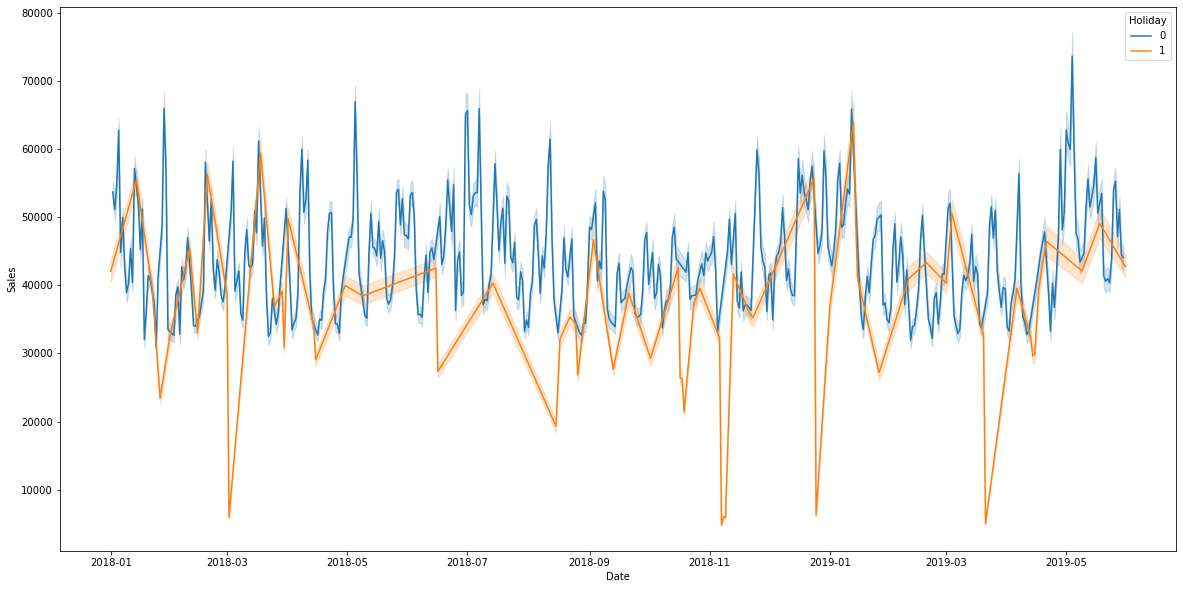

In [49]:
sns.lineplot(data=EDA_train, x="Date", y=(EDA_train['Sales']),hue='Holiday')

- Hoilday have higher effect in sales number
- some hoildays have steep decline in sales numbers.need to find out how manys days have sales below a threshold value

# Checking Outliers in sales figure

setting a threshold as 20000 as sales figure..exploring values below

In [50]:
EDA_train[EDA_train['Sales'] <= 20000 ]

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0       T1000001         1         S1            L3          R1 2018-01-01   
3       T1000004       251         S2            L3          R1 2018-01-01   
42      T1000043       235         S1            L1          R3 2018-01-01   
69      T1000070       231         S4            L2          R3 2018-01-01   
114     T1000115         2         S3            L1          R3 2018-01-01   
...          ...       ...        ...           ...         ...        ...   
188127  T1188128       101         S1            L4          R3 2019-05-31   
188159  T1188160        77         S2            L5          R3 2019-05-31   
188196  T1188197        71         S2            L5          R1 2019-05-31   
188225  T1188226       186         S2            L5          R2 2019-05-31   
188265  T1188266       203         S2            L4          R2 2019-05-31   

        Holiday Discount  #Order     Sales  
0             1      Yes       9   7011.84  
3             1      Yes      23  19715.16  
42            1      Yes      25  19381.86  
69            1      Yes      21  19131.12  
114           1      Yes      25  18137.52  
...         ...      ...     ...       ...  
188127        1       No      31  19909.44  
188159        1       No      26  18806.58  
188196        1       No      28  18909.99  
188225        1       No      27  19910.88  
188265        1       No      21  14512.17  

[10790 rows x 10 columns]

ploting the sales figure hue holiday

<AxesSubplot:xlabel='Date', ylabel='Sales'>

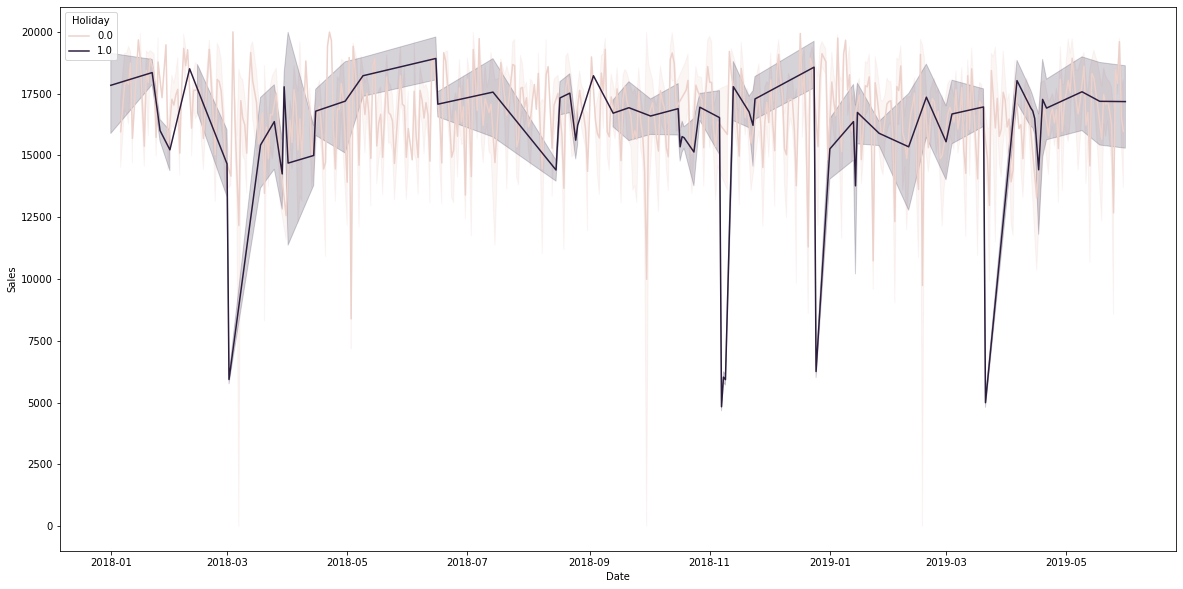

In [51]:
sns.lineplot(data=EDA_train[EDA_train['Sales'] < 20000 ], x="Date", y=(EDA_train['Sales']),hue='Holiday')

ploting the sales figure hue Discount

<AxesSubplot:xlabel='Date', ylabel='Sales'>

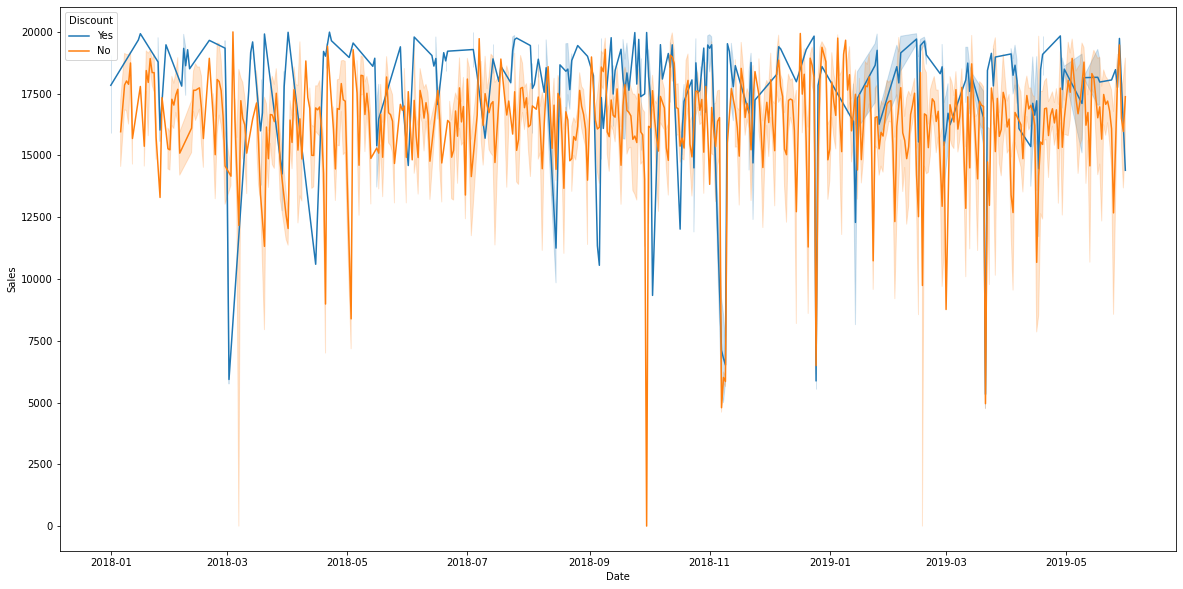

In [52]:
sns.lineplot(data=EDA_train[EDA_train['Sales'] < 20000 ], x="Date", y=(EDA_train['Sales']),hue='Discount')

By checking both the figure it is found that there are some outliers in data which gives low sales in some days.

 checking data for zero sales

In [53]:
EDA_train[EDA_train['Sales'] == 0]

ID  Store_id Store_Type Location_Type Region_Code       Date  \
23867   T1023868       311         S4            L2          R2 2018-03-07   
38143   T1038144       222         S4            L2          R2 2018-04-15   
90458   T1090459       233         S1            L3          R3 2018-09-05   
97301   T1097302       271         S1            L3          R2 2018-09-24   
97480   T1097481       271         S1            L3          R2 2018-09-25   
99489   T1099490        12         S1            L3          R2 2018-09-30   
99904   T1099905        12         S1            L3          R2 2018-10-01   
100215  T1100216        12         S1            L3          R2 2018-10-02   
112564  T1112565        39         S4            L1          R1 2018-11-05   
112853  T1112854        39         S4            L1          R1 2018-11-06   
113444  T1113445        39         S4            L1          R1 2018-11-07   
118972  T1118973       298         S4            L1          R1 2018-11-22   
119242  T1119243       298         S4            L1          R1 2018-11-23   
146897  T1146898       276         S1            L1          R2 2019-02-07   
150650  T1150651       317         S3            L1          R1 2019-02-17   
166738  T1166739       204         S4            L1          R3 2019-04-02   
166849  T1166850       204         S4            L1          R3 2019-04-03   
168885  T1168886       315         S4            L2          R1 2019-04-08   
169181  T1169182       315         S4            L2          R1 2019-04-09   

        Holiday Discount  #Order  Sales  
23867         0       No       0    0.0  
38143         1       No       0    0.0  
90458         0       No       0    0.0  
97301         0       No       0    0.0  
97480         0       No       0    0.0  
99489         0       No       0    0.0  
99904         0       No       0    0.0  
100215        1       No       0    0.0  
112564        0       No       0    0.0  
112853        1       No       0    0.0  
113444        1       No       0    0.0  
118972        0       No       0    0.0  
119242        1       No       0    0.0  
146897        0       No       0    0.0  
150650        0       No       0    0.0  
166738        0       No       0    0.0  
166849        0       No       0    0.0  
168885        0       No       0    0.0  
169181        0       No       0    0.0

some days only giving zero sales.later decide whether data need to removed or not.

# Insights from EDA


- No missing values.Data set looks clean
- There a postive correlation between sales and orders.so droping order doesn't need to consider while traning(Also order numbers are not in test set)
- ID can be removed since there is no relation between sales 
- Location type,Region,Store type have different sales figure.considerd for training
- Holiday and Discounthave effect in sales number.Considered for training
- Removing outliers in sales number considerd after training the model if desired accuaracy is not achieved


# 3.Data Preparation for Model Training

Following steps will be performed for preparing the data for the subsequent model training

- Based on the Exploratory Data Analysis and Coorelation study, the columns with weak relationship with the target column will be dropped
- Input and Target dataframes will be created
- Need to split datetime object into day,year,month for both test and train
- Label encoding methods applied to categorical columns
- Training and Validation datasets will be created
- A function will be defined based on which the models performance will be measured

In [54]:
EDA_train.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1000001         1         S1            L3          R1 2018-01-01   
1  T1000002       253         S4            L2          R1 2018-01-01   
2  T1000003       252         S3            L2          R1 2018-01-01   
3  T1000004       251         S2            L3          R1 2018-01-01   
4  T1000005       250         S2            L3          R4 2018-01-01   

   Holiday Discount  #Order     Sales  
0        1      Yes       9   7011.84  
1        1      Yes      60  51789.12  
2        1      Yes      42  36868.20  
3        1      Yes      23  19715.16  
4        1      Yes      62  45614.52

In [55]:
EDA_test.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1188341       171         S4            L2          R3 2019-06-01   
1  T1188342       172         S1            L1          R1 2019-06-01   
2  T1188343       173         S4            L2          R1 2019-06-01   
3  T1188344       174         S1            L1          R4 2019-06-01   
4  T1188345       170         S1            L1          R2 2019-06-01   

   Holiday Discount  
0        0       No  
1        0       No  
2        0       No  
3        0       No  
4        0       No

- Creating copy of both train and test set for Data prepration and model training

In [56]:
FE_train = EDA_train.copy()

In [57]:
FE_test = EDA_test.copy()

In [58]:
FE_train.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1000001         1         S1            L3          R1 2018-01-01   
1  T1000002       253         S4            L2          R1 2018-01-01   
2  T1000003       252         S3            L2          R1 2018-01-01   
3  T1000004       251         S2            L3          R1 2018-01-01   
4  T1000005       250         S2            L3          R4 2018-01-01   

   Holiday Discount  #Order     Sales  
0        1      Yes       9   7011.84  
1        1      Yes      60  51789.12  
2        1      Yes      42  36868.20  
3        1      Yes      23  19715.16  
4        1      Yes      62  45614.52

In [59]:
FE_test.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1188341       171         S4            L2          R3 2019-06-01   
1  T1188342       172         S1            L1          R1 2019-06-01   
2  T1188343       173         S4            L2          R1 2019-06-01   
3  T1188344       174         S1            L1          R4 2019-06-01   
4  T1188345       170         S1            L1          R2 2019-06-01   

   Holiday Discount  
0        0       No  
1        0       No  
2        0       No  
3        0       No  
4        0       No

 - creating new column Day,month and year

In [60]:
FE_train['Year'] = FE_train['Date'].dt.year
FE_train['Day'] = FE_train['Date'].dt.day
FE_train['Month'] = FE_train['Date'].dt.month


In [61]:
FE_train.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1000001         1         S1            L3          R1 2018-01-01   
1  T1000002       253         S4            L2          R1 2018-01-01   
2  T1000003       252         S3            L2          R1 2018-01-01   
3  T1000004       251         S2            L3          R1 2018-01-01   
4  T1000005       250         S2            L3          R4 2018-01-01   

   Holiday Discount  #Order     Sales  Year  Day  Month  
0        1      Yes       9   7011.84  2018    1      1  
1        1      Yes      60  51789.12  2018    1      1  
2        1      Yes      42  36868.20  2018    1      1  
3        1      Yes      23  19715.16  2018    1      1  
4        1      Yes      62  45614.52  2018    1      1

Droping ID,Date,'#Order' for train test set

In [83]:
FE_train_2 = FE_train.drop(['#Order','Date'],axis=1)

In [84]:
FE_train_2.head()

ID  Store_id Store_Type Location_Type Region_Code  Holiday Discount  \
0  T1000001         1         S1            L3          R1        1      Yes   
1  T1000002       253         S4            L2          R1        1      Yes   
2  T1000003       252         S3            L2          R1        1      Yes   
3  T1000004       251         S2            L3          R1        1      Yes   
4  T1000005       250         S2            L3          R4        1      Yes   

      Sales  Year  Day  Month  
0   7011.84  2018    1      1  
1  51789.12  2018    1      1  
2  36868.20  2018    1      1  
3  19715.16  2018    1      1  
4  45614.52  2018    1      1

- Checking data types of FE_train_2

In [86]:
FE_train_2.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Holiday            int64
Discount          object
Sales            float64
Year               int64
Day                int64
Month              int64
dtype: object

Repeat the same step for test set

In [65]:
FE_test['Year'] = FE_test['Date'].dt.year
FE_test['Day'] = FE_test['Date'].dt.day
FE_test['Month'] = FE_test['Date'].dt.month

In [66]:
FE_test.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1188341       171         S4            L2          R3 2019-06-01   
1  T1188342       172         S1            L1          R1 2019-06-01   
2  T1188343       173         S4            L2          R1 2019-06-01   
3  T1188344       174         S1            L1          R4 2019-06-01   
4  T1188345       170         S1            L1          R2 2019-06-01   

   Holiday Discount  Year  Day  Month  
0        0       No  2019    1      6  
1        0       No  2019    1      6  
2        0       No  2019    1      6  
3        0       No  2019    1      6  
4        0       No  2019    1      6

- Droping ID,Date for test set

In [81]:
FE_test_2 = FE_test.drop(['Date'],axis=1)

In [82]:
FE_test_2.head()

ID  Store_id Store_Type Location_Type Region_Code  Holiday Discount  \
0  T1188341       171         S4            L2          R3        0       No   
1  T1188342       172         S1            L1          R1        0       No   
2  T1188343       173         S4            L2          R1        0       No   
3  T1188344       174         S1            L1          R4        0       No   
4  T1188345       170         S1            L1          R2        0       No   

   Year  Day  Month  
0  2019    1      6  
1  2019    1      6  
2  2019    1      6  
3  2019    1      6  
4  2019    1      6

In [85]:
FE_test_2.dtypes

ID               object
Store_id          int64
Store_Type       object
Location_Type    object
Region_Code      object
Holiday           int64
Discount         object
Year              int64
Day               int64
Month             int64
dtype: object

# 3.1 Encoding

In [71]:
from xgboost import XGBRegressor
from sklearn import ensemble
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [87]:
encoder = LabelEncoder()

- creating copy of test and train dataset for Encoding

In [88]:
EC_train = FE_train_2.copy()

In [89]:
EC_train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code',
       'Holiday', 'Discount', 'Sales', 'Year', 'Day', 'Month'],
      dtype='object')

In [90]:
EC_train.head()

ID  Store_id Store_Type Location_Type Region_Code  Holiday Discount  \
0  T1000001         1         S1            L3          R1        1      Yes   
1  T1000002       253         S4            L2          R1        1      Yes   
2  T1000003       252         S3            L2          R1        1      Yes   
3  T1000004       251         S2            L3          R1        1      Yes   
4  T1000005       250         S2            L3          R4        1      Yes   

      Sales  Year  Day  Month  
0   7011.84  2018    1      1  
1  51789.12  2018    1      1  
2  36868.20  2018    1      1  
3  19715.16  2018    1      1  
4  45614.52  2018    1      1

In [91]:
EC_test = FE_test_2.copy()

In [93]:
EC_test.head()

ID  Store_id Store_Type Location_Type Region_Code  Holiday Discount  \
0  T1188341       171         S4            L2          R3        0       No   
1  T1188342       172         S1            L1          R1        0       No   
2  T1188343       173         S4            L2          R1        0       No   
3  T1188344       174         S1            L1          R4        0       No   
4  T1188345       170         S1            L1          R2        0       No   

   Year  Day  Month  
0  2019    1      6  
1  2019    1      6  
2  2019    1      6  
3  2019    1      6  
4  2019    1      6

In [94]:
for i in EC_train.columns: # Make a for loops
    if EC_train[i].dtype == 'object': 
        encoder.fit_transform(list(EC_train[i].values)) # Fit transform
        EC_train[i] = encoder.transform(EC_train[i].values) # Transform
         
        for j in EC_train.columns: # Make a for loops again
            if EC_train[j].dtype == 'int':
                EC_train[j] = EC_train[j].astype('float64') # Change the type

for k in EC_test.columns: # Make a for loops
    if EC_test[k].dtype == 'object': 
        encoder.fit_transform(list(EC_test[k].values)) # Fit transform
        EC_test[k] = encoder.transform(EC_test[k].values) # Transform
         
        for m in EC_test.columns: # Make a for loops again
            if EC_test[m].dtype == 'int':
                EC_test[m] = EC_test[m].astype('float64')

In [95]:
EC_test.head()

ID  Store_id  Store_Type  Location_Type  Region_Code  Holiday  Discount  \
0  0.0       171         3.0            1.0          2.0        0       0.0   
1  1.0       172         0.0            0.0          0.0        0       0.0   
2  2.0       173         3.0            1.0          0.0        0       0.0   
3  3.0       174         0.0            0.0          3.0        0       0.0   
4  4.0       170         0.0            0.0          1.0        0       0.0   

   Year  Day  Month  
0  2019    1      6  
1  2019    1      6  
2  2019    1      6  
3  2019    1      6  
4  2019    1      6

In [96]:
X = EC_train.drop(columns=['ID', 'Sales']) # Data X
y = EC_train['Sales'] # Data y     
X_test = EC_test.drop(columns=['ID'])

In [102]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,test_size=0.3, 
    random_state=42)

In [104]:
pipe = Pipeline([ # Our Pipeline
    ('scaler', MinMaxScaler()),
    ('transformer', QuantileTransformer()),
    ('model', XGBRegressor(
        learning_rate=0.09,
        n_estimators=12000,
        random_state=42,
        objective='reg:squarederror',
        booster='gbtree'
    ))
])

pipe.fit(X_train, y_train) # Train Data

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('transformer', QuantileTransformer()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.09,
                              max_delta_step=0, max_depth=6, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=12000, n_jobs=8, num_parallel_tree=1,
                              random_state=42, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [105]:
from sklearn import metrics
import math

In [106]:
pred_train = pipe.predict(X_train) # Predict Train Data
pred_valid = pipe.predict(X_valid) # Predict Valid Data

In [107]:
train_r2_score = metrics.r2_score(y_train, pred_train) # R2_score
print(f'Train R2_score: {train_r2_score}')

train_mse = metrics.mean_squared_error(y_train, pred_train) # MSE Score
print(f'Train MSE : {train_mse}')

train_RMSE = math.sqrt(metrics.mean_squared_error(y_train, pred_train)) # SQRT MSE Score
print(f'Train RMSE : {train_RMSE}')

Train R2_score: 0.9410293310018554
Train MSE : 20131413.16646467
Train RMSE : 4486.8043378851135


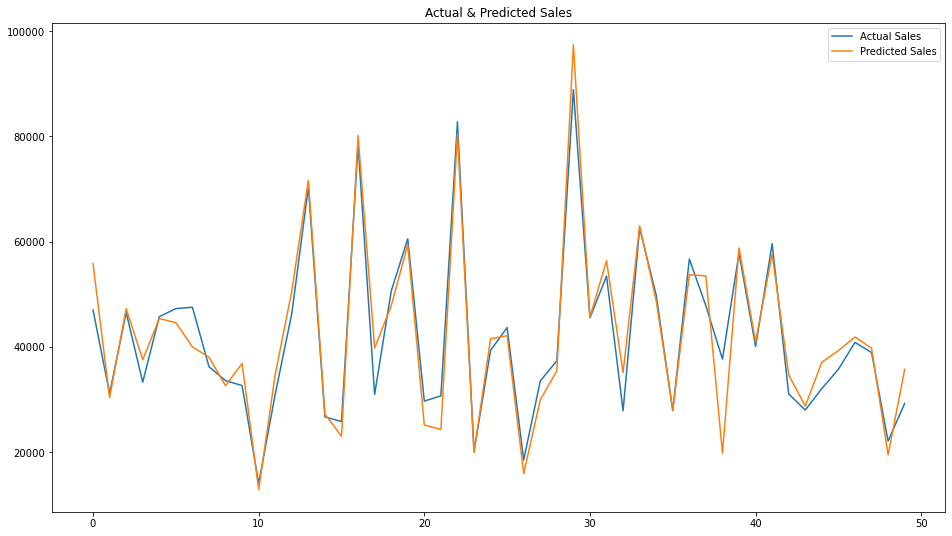

In [108]:
train = pd.DataFrame(
    {'Predicted Sales':pred_train, 'Actual Sales':y_train}
)

fig= plt.figure(
    figsize=(16, 9)
)

train = train.reset_index()
train = train.drop(
    ['index'],axis=1
)

plt.plot(train[:50])
plt.legend(['Actual Sales','Predicted Sales'])
plt.title('Actual & Predicted Sales')
plt.show()

# Evaluate Valid Data

In [109]:
test_r2_score = metrics.r2_score(y_valid, pred_valid) # R2_score
print(f'Test R2_score: {test_r2_score}')

test_mse = metrics.mean_squared_error(y_valid, pred_valid) # MSE Score
print(f'Test MSE : {test_mse}')

test_RMSE = math.sqrt(metrics.mean_squared_error(y_valid, pred_valid)) # SQRT MSE Score
print(f'Test RMSE : {test_RMSE}')

Test R2_score: 0.8284896365127286
Test MSE : 58131760.19992097
Test RMSE : 7624.418679474585


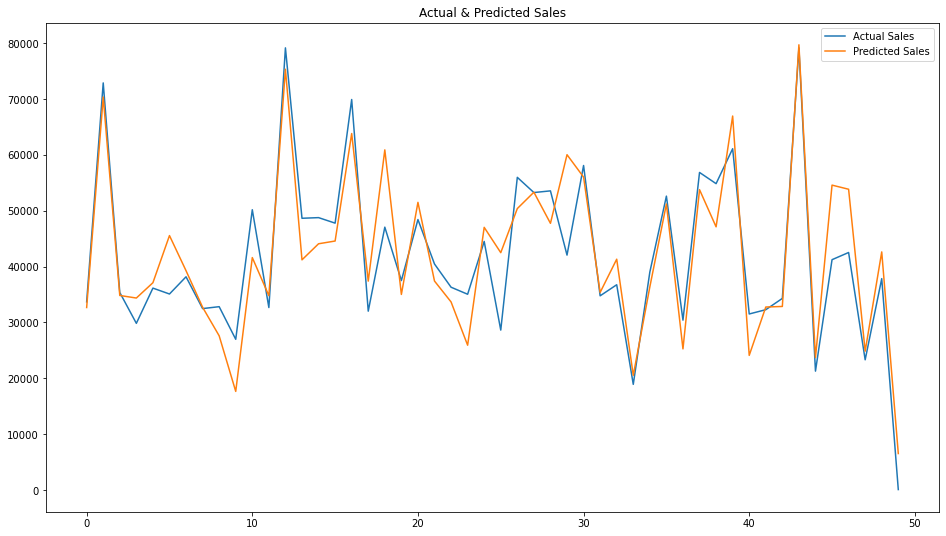

In [110]:
test = pd.DataFrame(
    {'Predicted Sales':pred_valid, 'Actual Sales':y_valid}
)

fig= plt.figure(
    figsize=(16, 9)
)

test = test.reset_index()
test = test.drop(
    ['index'],axis=1
)

plt.plot(test[:50])
plt.legend(['Actual Sales','Predicted Sales'])
plt.title('Actual & Predicted Sales')
plt.show()

In [111]:
pred_test = pipe.predict(X_test)

In [113]:
pred_test

array([68899.07 , 53322.043, 92697.234, ..., 45969.945, 27212.113,
       23221.738], dtype=float32)